In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np


In [2]:
#ucitavanje i podela na opis instanci i klase
df = pd.read_csv("C:/Users/student/Desktop/ipIndustija4/ipVezbe92021/vezbe9/iris.csv")

features = df.columns[:4].tolist()

x=df[features]
x.columns = features
y=df["Species"]

#izdvajanje broja atributa
num_features = x.shape[1]


In [3]:
#standardizacija podataka
scaler = preprocessing.StandardScaler().fit(x)
x =pd.DataFrame(scaler.transform(x))
x.columns = features


In [4]:
#primena pca
pca=PCA()

#pca=PCA(n_components=2) #izdvajanje prve dve glavne komponente


In [5]:
#pravljenje pca modela
pca.fit(x)


PCA()

In [6]:
#transformisanje skupa koriscenjem pca modela
x_pca = pd.DataFrame(pca.transform(x))


In [7]:
#preimenovanje atributa transformisanog skupa
pca_columns = ['pca%d'%i for i in range(1, pca.n_components_+1)]
x_pca.columns=pca_columns


In [8]:
#prikaz izraza po kome se racunaju vrednosti u svakoj od glavnih komponenti
print('components_ ')
for i, component in zip(range(1, pca.n_components_+1), pca.components_):
    pca_desc="pca%d"%i + "="
    for j, value in zip(range(0, num_features), component):
        pca_desc+="%.2f*%s"%(value, features[j])
    print(pca_desc)


components_ 
pca1=0.52*Sepal_Length-0.27*Sepal_Width0.58*Petal_Length0.56*Petal_Width
pca2=0.38*Sepal_Length0.92*Sepal_Width0.02*Petal_Length0.07*Petal_Width
pca3=-0.72*Sepal_Length0.24*Sepal_Width0.14*Petal_Length0.63*Petal_Width
pca4=-0.26*Sepal_Length0.12*Sepal_Width0.80*Petal_Length-0.52*Petal_Width


In [10]:
#procenat varijanse objasnjen svakom od glavnih komponenti
print('explained_variance_ratio_  ')
for i, evr in zip(range(1, num_features+1), pca.explained_variance_ratio_):
    print("pca%d: %.10f"%(i,evr))



explained_variance_ratio_  
pca1: 0.7296244541
pca2: 0.2285076179
pca3: 0.0366892189
pca4: 0.0051787091


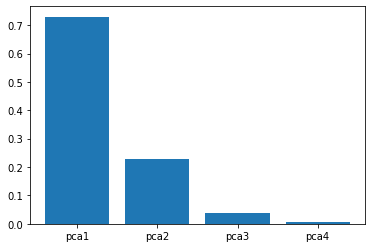

In [12]:
t=plt.bar(pca_columns,  pca.explained_variance_ratio_,  label='Procenat varijanse')


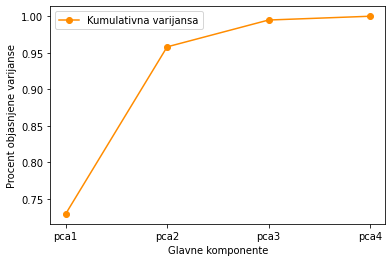

In [20]:
# Prikaz kumulativne sume procenta varijanse za glavne komponente.
# Koristan je za odredjivanje dovoljnog broja glavnih komponenti, tj. atributa
# za dalji rad. Za ovaj primer to je 2 - jer je kumulativna suma procenta varijanse
# za prve dve komponente veca od 95%
plt.plot(pca_columns,  np.cumsum(pca.explained_variance_ratio_), color='darkorange', label='Kumulativna varijansa',  marker='o')
         
#postavljanje teksta za x i y osu i legende
plt.xlabel('Glavne komponente')
plt.ylabel('Procent objasnjene varijanse')
plt.legend()

#prikaz slike
plt.show()



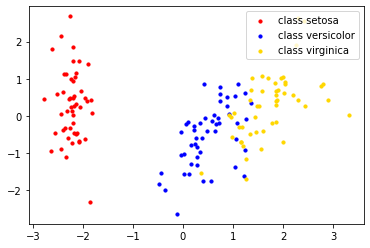

In [21]:
colors = ['red', 'blue', 'gold']

#Grafcki prikaz skupa iris pomocu rasprsenih elemenata koriscenjem prve dve glavne komponente
#Svakoj klasi se dodeljuje odredjena boja, a instance na slici
#se obelezavaju bojom na osnovu klase kojoj pripadaju
classes =y.unique()

#za svaku klasu
for i, class_value in zip(range(0, len(classes)), classes):
    #izdvajaju se instance klase
    class_samples = x_pca.iloc[ y[ y == class_value].index]

    #i prikazuju se pomocu rasprsenih elemenata
    plt.scatter(class_samples['pca1'], class_samples['pca2'], color=colors[i],
                s=10, marker='o', label="class %s" % class_value)

#postavljanje legende
plt.legend(loc='upper right')

#prikaz slike
plt.show()

